## Carga de librerias e incializacion


## X. Evaluación

Para evaluar los modelos se toma el conjunto de datos y se lo separa en *train* y *test* usando la librería *scikit-learn*.
Se entrena el modelo con el conjunto *train* variando el hiperparámetro N (con valores 1, 2, 3 y 4) y obteniendo cuatro predicotres diferentes. Posteriormente se usan las frases del conjunto *test* para la predicción.
Para la evaluación se toma un criterio de precisión con respecto a los aciertos del predictor. Para cada frase del conjutno *test*, se itera a través de las palabras para ir consiguiendo las predicciones. Luego se comparara la predicción con la palabra que efectivamente seguía en la frase.

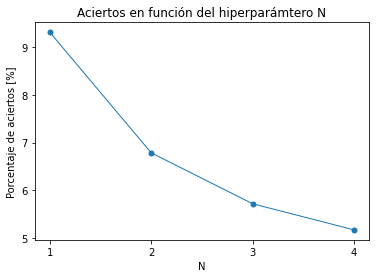

En la imagen anterior se observa como el porcenaje de aciertos disminuye a medida que aumenta N. El resultado es contraintuitivo ya que era de esperarse que al tener un mejor contexto, la predicción sería mejor. Sin embargo, al observar únicamente la palabra anterior se obtienen mejores resultados.

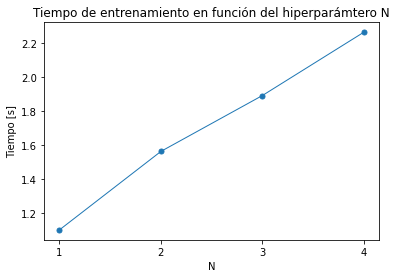
Observando el tiempo que tarda en entrenar cada predictor, era de esperarse que a mayor N mayor tiempo. En este caso la relación tiene un aspecto lineal con respecto a N. 

A priori se podría pensar que las palabras acertadas por el predictor tienen mayor frecuencia en el conjunto de datos con respecto a las predicciones con error, por lo que se grafica la media y la desviación estándar de las frecuencias de las palabras entregadas por el predictorcon N=1.

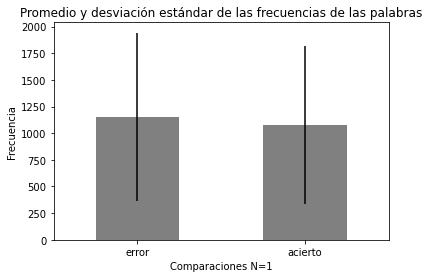
Se observa que las medias de las frecuencias son similares, e incluso la media de las frecuencais en el conjunto de datos de las palabras acertadas es un poco menor que la de los errores.
Es interesante ver la distribución de estas frecuencias, por lo que se realiza un gráfico de violín.


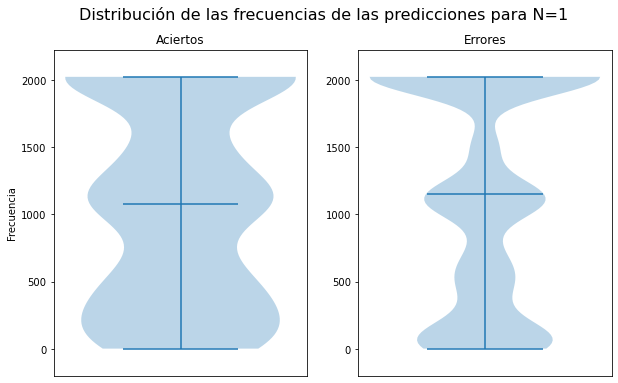
En le gráfico anterior no se observa una diferencia sustancial en la distribución de las frecuencias. Esto lleva a pensar que los aciertos se dan tanto con palabras poco frecuentes asi como con palabras muy frecuentes.
Se puede graficar lo mismo pero para el hiperprámetro N=4.

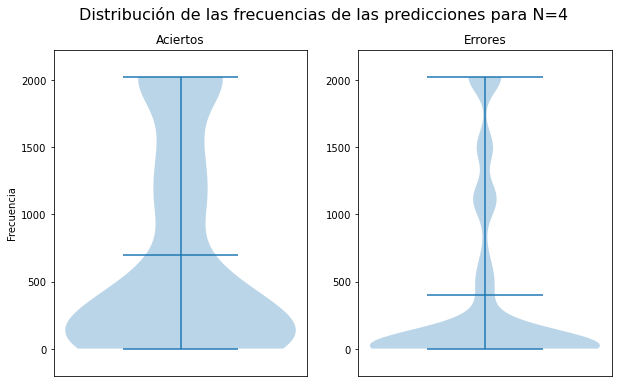
No se observan diferencias cualitativas importantes entre ambos gráficos considerando que un grupo tiene menor cantidad de datos, pero sí resulta interesante notar como los gráficos de violín para N=4 se ensachan en la parte inferior con respecto a los de N=1.
Para poder observar con mejor detalle este comportamiento, se grafica el promedio de las frecuencias de las palabras que arroja el predictor para cada N.

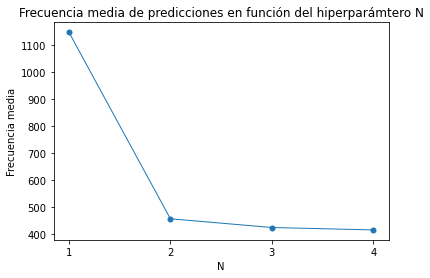
La característica a resaltar es que la frecuencia media de las palabras entregadas por el predictor decae en función de N. Es interesante notar como palabras muy frecuentes son ponderadas a la baja a medida que el resultado tiene más factores multiplicando.

En conclusión, para el conjunto de datos trabajdos y los modelos propouestos, la utilización del hiperpámetro N=1 se ejecuta en un menor tiempo, entregando mejores resultados. 

Se puede variar el parámetro m del m-estimador para ver como inciden en los resultados

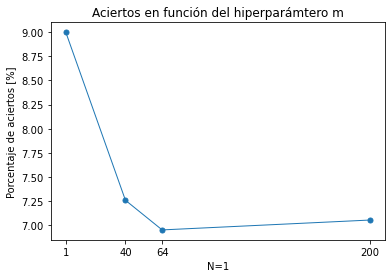
En le gráfico se observa como los aciertos decaen a medida que se aumenta m. El modelo utiliza N=1.
Se puede evaluar con un N diferente para ver si tiene el mismo resultado.

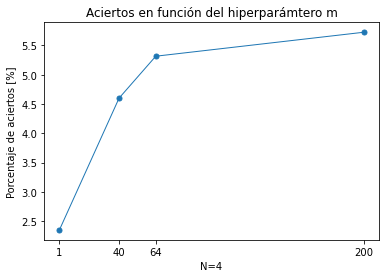
Para N=4 el efecto del parámetro m es el inverso, mejorando los aciertos conforme crece el parámetro.

### X. Cliente

A continuación se presenta la eimplementación del algoritmo para ser usada

In [ ]:
from preprocess import load_wpp_data
from bayes import BayesPredictor

In [ ]:
WPP_FILENAME='Datos/chat_big.txt'
SPANISH_DICT_FILENAME='Datos/es.txt'
HORIZONTE=4
m=2



In [ ]:

data=load_wpp_data(WPP_FILENAME)
print(data.head)

In [ ]:
with open(SPANISH_DICT_FILENAME, 'r', encoding='utf-8') as archivo:
    palabras_validas=set()
    for linea in archivo:
        palabra = linea.strip()
        palabras_validas.add(palabra)

In [ ]:
predictor=BayesPredictor(data["palabras"],HORIZONTE,m,palabras_validas)
print(predictor.vocab())

In [ ]:

##### LOOP PRINCIPAL #####

print("Ingrese la frase dando ENTER luego de \x1b[3mcada palabra\x1b[0m.")
print("Ingrese sólo ENTER para aceptar la recomendación sugerida, o escriba la siguiente palabra y de ENTER")
print("Ingrese '.' para comenzar con una frase nueva.")
print("Ingrese '..' para terminar el proceso.")

frase = []
palabra_sugerida = ""
while 1:
    palabra = input(">> ")

    if palabra == "..":
        break

    elif palabra == ".":
        predictor.update(frase)
            
        print("----- Comenzando frase nueva -----")
        frase = []

    elif palabra == "": # acepta última palabra sugerida
        frase.append(palabra_sugerida)

    else: # escribió una palabra
        frase.append(palabra)

    if frase:
        palabra_sugerida = predictor.predict(frase,verbose=True)
    
        frase_propuesta = frase.copy()
        frase_propuesta.append("\x1b[3m"+ palabra_sugerida +"\x1b[0m")
    
        print(" ".join(frase_propuesta))

